In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [5]:
train = pd.read_csv(r"C:\Users\dhanu\Downloads\digit-recognizer\dataset\train.csv")
test = pd.read_csv(r"C:\Users\dhanu\Downloads\digit-recognizer\dataset\test.csv")

In [6]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [8]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [9]:
train['label']

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [10]:
X = train.drop("label", axis=1).values
y = train["label"].values

In [11]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(42000, 784))

In [12]:
X = X / 255.0
test_images = test.values / 255.0

X = X.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

y = to_categorical(y, num_classes=10)

In [13]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

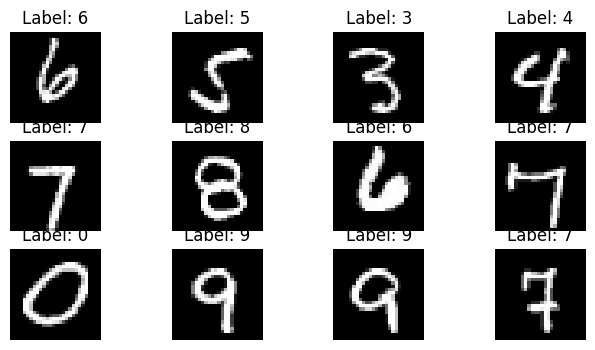

In [14]:
plt.figure(figsize=(8, 4))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap="gray")
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis("off")
plt.show()

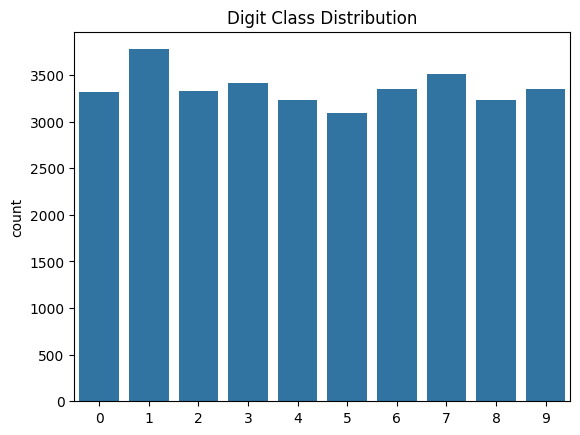

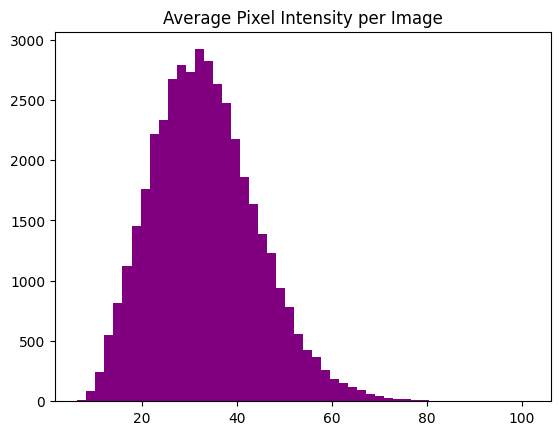

In [15]:
sns.countplot(x=np.argmax(y_train, axis=1))
plt.title("Digit Class Distribution")
plt.show()

pixel_means = train.drop("label", axis=1).mean(axis=1)
plt.hist(pixel_means, bins=50, color="purple")
plt.title("Average Pixel Intensity per Image")
plt.show()

In [17]:
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(X_train)

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3,3), activation="relu"),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D((2,2)),
    Dropout(0.25), 

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(10, activation="softmax")
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [19]:
early_stop = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    epochs=20,
    validation_data=(X_val, y_val),
    callbacks=[early_stop]
)

Epoch 1/20


c:\Users\dhanu\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


525/525 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.7624 - loss: 0.7246 - val_accuracy: 0.9655 - val_loss: 0.1152
Epoch 2/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 27s 51ms/step - accuracy: 0.9065 - loss: 0.3072 - val_accuracy: 0.9800 - val_loss: 0.0631
Epoch 3/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 98s 187ms/step - accuracy: 0.9299 - loss: 0.2301 - val_accuracy: 0.9833 - val_loss: 0.0513
Epoch 4/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 102s 111ms/step - accuracy: 0.9410 - loss: 0.1943 - val_accuracy: 0.9860 - val_loss: 0.0447
Epoch 5/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - accuracy: 0.9482 - loss: 0.1661 - val_accuracy: 0.9875 - val_loss: 0.0398
Epoch 6/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 21s 39ms/step - accuracy: 0.9540 - loss: 0.1546 - val_accuracy: 0.9895 - val_loss: 0.0317
Epoch 7/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - accuracy: 0.9567 - loss: 0.1425 - val_accuracy: 0.9885 - val_loss: 0.0359
Epoch 8/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 55s 105ms/step - accuracy: 0.9603 - loss: 0.1321 - val_acc

In [20]:
val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Accuracy: {val_acc*100:.2f}%")
print(f"Validation Loss: {val_loss*100:.2f}%")

Validation Accuracy: 99.11%
Validation Loss: 2.49%


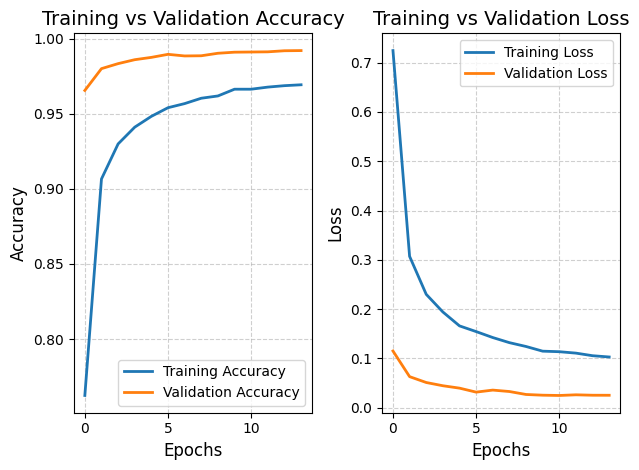

In [21]:
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], linewidth=2, label="Training Accuracy")
plt.plot(history.history["val_accuracy"], linewidth=2, label="Validation Accuracy")
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.title("Training vs Validation Accuracy", fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

plt.subplot(1,2,2)
plt.plot(history.history["loss"], linewidth=2, label="Training Loss")
plt.plot(history.history["val_loss"], linewidth=2, label="Validation Loss")
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.title("Training vs Validation Loss", fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9911 - loss: 0.0249
Validation Accuracy: 0.9911
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


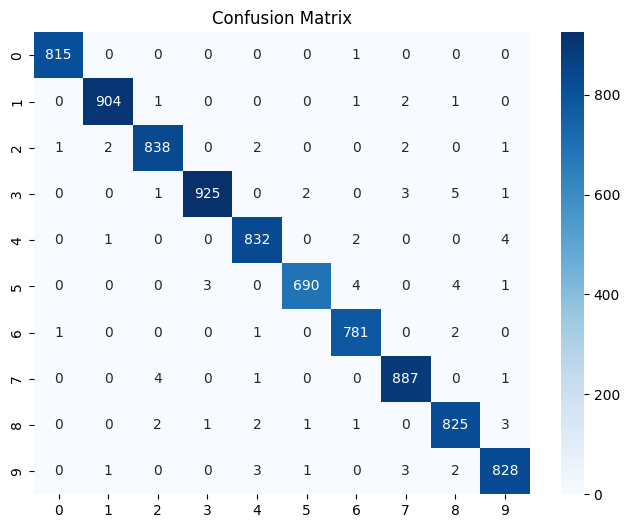

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       816
           1       1.00      0.99      1.00       909
           2       0.99      0.99      0.99       846
           3       1.00      0.99      0.99       937
           4       0.99      0.99      0.99       839
           5       0.99      0.98      0.99       702
           6       0.99      0.99      0.99       785
           7       0.99      0.99      0.99       893
           8       0.98      0.99      0.99       835
           9       0.99      0.99      0.99       838

    accuracy                           0.99      8400
   macro avg       0.99      0.99      0.99      8400
weighted avg       0.99      0.99      0.99      8400



In [22]:
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_acc:.4f}")

y_val_pred = model.predict(X_val).argmax(axis=1)
y_val_true = y_val.argmax(axis=1)

cm = confusion_matrix(y_val_true, y_val_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_val_true, y_val_pred))

In [23]:
probs = model.predict(test_images, batch_size=256, verbose=0)
y_pred = np.argmax(probs, axis=1)

submission = pd.DataFrame({
    "ImageId": np.arange(1, len(y_pred) + 1),
    "Label": y_pred
})
submission.to_csv("submission.csv", index=False)
print("Saved submission.csv")

Saved submission.csv


In [24]:
model.save("digit_cnn.h5")

In [25]:
import joblib
joblib.dump(model, "digit_cnn.pkl")

['digit_cnn.pkl']